First we get the RGB data set:

In [1]:
import numpy as np
from pandas import Series, DataFrame
import pandas as pd
from skimage import io
from sklearn.cluster import KMeans

photo = io.imread("https://upload.wikimedia.org/wikipedia/commons/thumb/9/97/Swallow-tailed_bee-eater_%28Merops_hirundineus_chrysolaimus%29.jpg/768px-Swallow-tailed_bee-eater_%28Merops_hirundineus_chrysolaimus%29.jpg")

photo = np.array(photo, dtype=np.float64) / 255  # Scale values
w, h, d = original_shape = tuple(photo.shape)  # Get the current shape
image_array = np.reshape(photo, (w * h, d))  # Reshape to to 2D

pixels = DataFrame(image_array, columns=["Red", "Green", "Blue"])

pixels_sample = pixels.sample(frac=0.05)

Then we compute the L\*a\*b\* dataset:

In [2]:
from skimage.color import rgb2lab

photo_lab = rgb2lab(photo)  # This is where we convert colour space
w, h, d = original_shape = tuple(photo_lab.shape)
image_array_lab = np.reshape(photo_lab, (w * h, d))

pixels_lab = DataFrame(image_array_lab, columns=["L", "a", "b"])

pixels_sample_lab = pixels_lab.sample(frac=0.05)

Then we normalise the two inertia values so we can compare them alongside each other:

In [3]:
kmeans = KMeans(n_clusters=1, n_init="auto").fit(pixels_sample[["Red", "Green", "Blue"]])
kmeans_lab = KMeans(n_clusters=1, n_init="auto").fit(pixels_sample_lab[["L", "a", "b"]])

norm = kmeans_lab.inertia_ / kmeans.inertia_

Then we loop over the number of clusters and calculate the inertia of each:

<Axes: >

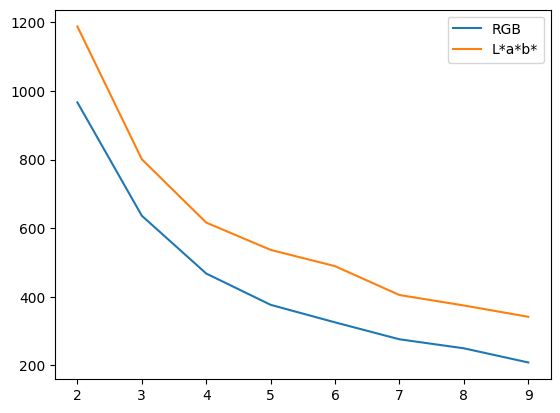

In [4]:
%matplotlib inline

inertia_values = []
r = pd.RangeIndex(2, 10)
for n_clusters in r:
    kmeans = KMeans(n_clusters=n_clusters, n_init="auto").fit(pixels_sample[["Red", "Green", "Blue"]])
    kmeans_lab = KMeans(n_clusters=n_clusters, n_init="auto").fit(pixels_sample_lab[["L", "a", "b"]])
    inertia_values.append((kmeans.inertia_, kmeans_lab.inertia_ / norm))

inertia = DataFrame(inertia_values, columns=["RGB", "L*a*b*"], index=r)
inertia.plot()